In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [2]:
#Reading file Travel_Time
Path = r'C:\Users\Dhwani\Desktop\AppoMania\AppleStore.csv'
appleStoreDf = pd.read_csv(Path,parse_dates=True)
appleStoreDf.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
appleStoreDf.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [4]:
print(len(appleStoreDf['id'].unique()))
print(len(appleStoreDf['prime_genre'].unique()))

7197
23


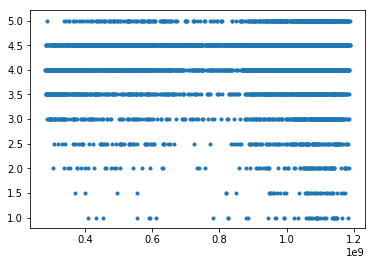

In [66]:
plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , appleStoreDf['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , marker='.');

In [50]:
print(len(appleStoreDf[['user_rating']][appleStoreDf.user_rating==0]))
print(len(appleStoreDf[['user_rating']][appleStoreDf.user_rating!=0]))
print(len(appleStoreDf[['user_rating_ver']][appleStoreDf.user_rating_ver==0]))
print(len(appleStoreDf[['user_rating_ver']][appleStoreDf.user_rating_ver!=0]))

929
6268
1443
5754


In [55]:
data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
data.head()
#print(data['user_rating'][data.user_rating!=0])

,user_rating,user_rating_ver
0,4.0,4.5
1,4.0,3.5
2,3.5,4.5
3,4.0,4.5
4,4.5,5.0


In [48]:
#Applying Isolation forest model on our dataset

from sklearn import preprocessing
# Take useful feature and standardize them 
data = appleStoreDf[['user_rating', 'user_rating_ver']][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = 0.05)
model.fit(data)
# add the data to the main  
appleStoreDf['anomaly25'] = pd.Series(model.predict(data))
appleStoreDf['anomaly25'] = appleStoreDf['anomaly25'].map( {1: 0, -1: 1} )
print(appleStoreDf['anomaly25'].value_counts())

0.0    5465
1.0     289
Name: anomaly25, dtype: int64


In [64]:
appleStoreDf.loc[appleStoreDf['anomaly25'] == 1.0]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,anomaly25,anomaly27
46,54,293760823,iFart - The Original Fart Sounds App,60320768,USD,1.99,21825,10,3.0,4.0,4.0.8,9+,Entertainment,37,5,1,1,1.0,0.0
64,73,298127110,ProPresenter Remote,46922752,USD,4.99,410,7,3.0,2.5,4.8.1,4+,Utilities,37,5,1,1,1.0,0.0
79,90,301521403,Nike+ Training Club - Workouts & Fitness Plans,140367872,USD,0.00,33969,466,3.5,5.0,5.4.1,4+,Health & Fitness,37,0,17,1,1.0,0.0
164,186,320596872,Sparkasse+,119648256,USD,0.99,30,0,3.0,0.0,3.1.3,4+,Finance,37,0,3,1,1.0,0.0
182,207,325683306,"MyRadar Pro NOAA Weather Radar, Forecasts & St...",123718656,USD,1.99,13915,205,4.5,5.0,5.1.4,4+,Weather,37,2,8,1,1.0,0.0
192,220,327243363,NFL Sunday Ticket,96093184,USD,0.00,24258,305,3.0,2.5,2.6.042,4+,Entertainment,37,0,1,1,1.0,0.0
211,240,331271904,Bloons TD,8432232,USD,2.99,7941,76,4.0,3.5,1.2.1,4+,Games,47,0,1,1,1.0,0.0
220,250,333710667,Scanner Pro - PDF document scanner app with OCR,101346304,USD,3.99,31912,154,4.5,5.0,7.1.3,4+,Business,37,5,9,1,1.0,0.0
263,297,340779800,The Christmas List,26137600,USD,1.99,2722,1,4.5,5.0,2.1,4+,Shopping,37,0,1,1,1.0,0.0
268,302,341776037,5-0 Radio Pro Police Scanner (Extra Feeds),49594368,USD,3.99,24553,2620,4.0,4.5,39.1,9+,News,38,5,26,1,1.0,0.0


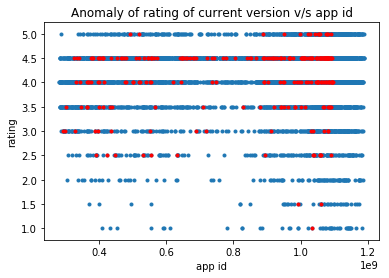

In [65]:
# Plotting anomaly of rating of current version for all apps 

plt.scatter(appleStoreDf['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            , appleStoreDf['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)], marker='.');
plt.scatter(appleStoreDf.loc[appleStoreDf['anomaly25'] == 1]['id'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            ,appleStoreDf.loc[appleStoreDf['anomaly25'] == 1]['user_rating'][(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]
            ,color='red',marker='.');
plt.title('Anomaly of rating of current version v/s app id')
plt.xlabel("app id")
plt.ylabel("rating")
plt.show()

In [69]:
from sklearn.decomposition import PCA

# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

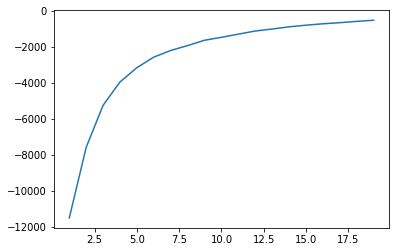

In [73]:
from sklearn.cluster import KMeans
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [80]:
print(len(kmeans[5].predict(data)))
print(len(appleStoreDf))

5754
7197


In [82]:
tempDf = appleStoreDf[(appleStoreDf.user_rating_ver!=0) & (appleStoreDf.user_rating!=0)]

In [83]:
tempDf.count()tempDf

Unnamed: 0          5754
id                  5754
track_name          5754
size_bytes          5754
currency            5754
price               5754
rating_count_tot    5754
rating_count_ver    5754
user_rating         5754
user_rating_ver     5754
ver                 5754
cont_rating         5754
prime_genre         5754
sup_devices.num     5754
ipadSc_urls.num     5754
lang.num            5754
vpp_lic             5754
anomaly25           4690
anomaly27            564
dtype: int64

In [85]:
# Not clear for me, I choose 15 centroids arbitrarily and add these data to the central dataframe
tempDf['cluster'] = kmeans[4].predict(data)
tempDf['principal_feature1'] = data[0]
tempDf['principal_feature2'] = data[1]
tempDf['cluster'].value_counts()

C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

2    2832
0    1543
4     564
1     428
3     387
Name: cluster, dtype: int64

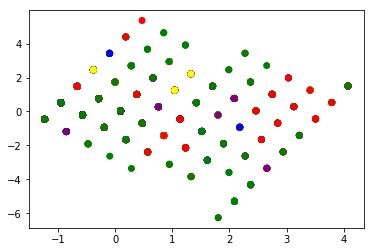

In [87]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'purple'}
ax.scatter(tempDf['principal_feature1'], tempDf['principal_feature2'], c=tempDf["cluster"].apply(lambda x: colors[x]))
plt.show()

In [89]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

In [94]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[14])
number_of_outliers = int(0.05*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
tempDf['anomaly21'] = (distance >= threshold).astype(int)

C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Dhwani\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
tempDf = tempDf.dropna()

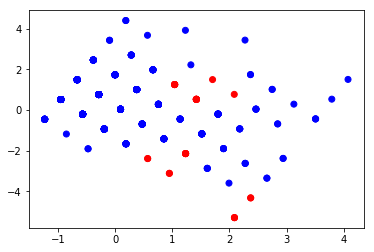

In [107]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(tempDf['principal_feature1'], tempDf['principal_feature2'], c=tempDf["anomaly21"].apply(lambda x: colors[x]))
plt.show()

In [10]:
#Reading file Travel_Time
Path = r'C:\Users\Dhwani\Desktop\AppoMania\googleplaystore.csv'
googleStoreDf = pd.read_csv(Path,parse_dates=True)
googleStoreDf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [11]:
googleStoreDf.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
googleStoreDf['Price'] = googleStoreDf['Price'].astype('str').str.replace('$', '')


googleStoreDf['Price'] = pd.to_numeric(googleStoreDf['Price'])

In [13]:
googleStoreDf['Price']


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
10810    0.0
10811    0.0
10812    0.0
10813    0.0
10814    0.0
10815    0.0
10816    0.0
10817    0.0
10818    0.0
10819    0.0
10820    0.0
10821    0.0
10822    0.0
10823    0.0
10824    0.0
10825    0.0
10826    0.0
10827    0.0
10828    0.0
10829    0.0
10830    0.0
10831    0.0
10832    0.0
10833    0.0
10834    0.0
10835    0.0
10836    0.0
10837    0.0
10838    0.0
10839    0.0
Name: Price, Length: 10840, dtype: float64

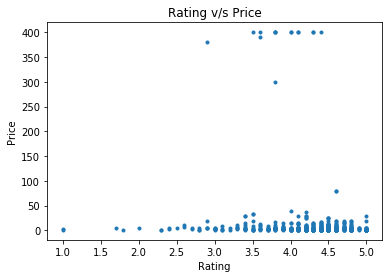

In [14]:
plt.scatter(googleStoreDf['Rating'][googleStoreDf.Price != 0], googleStoreDf['Price'][googleStoreDf.Price != 0], marker='.');

plt.title('Rating v/s Price')
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

In [15]:
print(googleStoreDf['Price'][googleStoreDf.Price != 0])
#googleStoreDf['Price'].head()

234       4.99
235       4.99
290       4.99
291       4.99
427       3.99
476       3.99
477       6.99
478       1.49
479       2.99
480       3.99
481       7.99
571       3.99
851       3.99
852       5.99
853       3.99
854       3.99
995       4.99
1001      2.99
1227      3.49
1228      4.99
1327      2.99
1335      3.99
1341      2.99
1347      2.99
1831      2.99
1832      1.99
1833      4.99
1834      4.99
1835      4.99
1836      5.99
         ...  
10453     2.99
10457     2.99
10459     1.99
10460     1.00
10516     1.49
10530     3.49
10539     2.99
10569     1.99
10582     6.99
10585     0.99
10593     1.99
10644     8.99
10649     5.49
10650     6.49
10660     5.99
10661     6.49
10663     6.49
10667     6.49
10668     5.99
10673     5.49
10674     0.99
10678     2.99
10681     0.99
10689     0.99
10696     0.99
10734     0.99
10759     7.99
10781    16.99
10784     1.20
10797     1.04
Name: Price, Length: 800, dtype: float64


In [23]:
data = [googleStoreDf['Rating'][googleStoreDf.Price != 0], googleStoreDf['Rating'][googleStoreDf.Price != 0]]
print(data)

[234      4.7
235      4.8
290      4.7
291      4.8
427      4.0
476      4.2
477      2.6
481      3.5
571      4.2
851      4.9
852      4.7
853      4.7
854      4.7
995      4.6
1001     4.6
1227     4.6
1228     4.1
1327     4.4
1335     4.6
1341     4.8
1347     4.4
1831     4.4
1832     4.6
1833     4.9
1834     4.4
1835     4.5
1836     4.6
1837     4.2
1838     4.5
1839     4.6
        ... 
10052    2.8
10060    4.7
10066    3.7
10072    4.5
10073    4.2
10122    4.4
10270    4.5
10442    4.8
10446    3.7
10448    3.7
10450    4.5
10453    4.5
10457    4.6
10459    4.7
10460    4.5
10530    4.8
10539    4.0
10569    4.6
10582    3.8
10585    4.4
10593    4.3
10644    3.9
10674    4.2
10678    4.6
10681    4.3
10689    5.0
10696    5.0
10759    4.4
10781    3.8
10784    4.2
Name: Rating, Length: 645, dtype: float64, 234      4.7
235      4.8
290      4.7
291      4.8
427      4.0
476      4.2
477      2.6
481      3.5
571      4.2
851      4.9
852      4.7
853      4.7
854    

In [33]:
#Applying Isolation forest model on our dataset

from sklearn import preprocessing
# Take useful feature and standardize them 
data = googleStoreDf[['Rating','Price']][googleStoreDf.Price != 0]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = 0.05)
model.fit(data)
# add the data to the main  
googleStoreDf['anomaly27'] = pd.Series(model.predict(data))
googleStoreDf['anomaly27'] = googleStoreDf['anomaly27'].map( {1: 0, -1: 1} )
print(googleStoreDf['anomaly27'].value_counts())

0.0    575
1.0     32
Name: anomaly27, dtype: int64


In [18]:
print(googleStoreDf.isna().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [19]:
googleStoreDf=googleStoreDf.dropna()

In [20]:
googleStoreDf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [21]:
print(googleStoreDf.isna().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [34]:
googleStoreDf.loc[googleStoreDf['anomaly27'] == 1.0]['Rating']

70     4.8
82     4.0
115    4.5
117    4.0
124    3.9
131    4.0
135    4.1
166    4.1
172    4.3
183    4.4
194    4.3
195    3.9
302    3.9
303    4.1
304    4.4
305    4.6
306    4.5
307    4.7
308    4.4
309    4.5
311    3.2
312    3.2
313    4.1
315    4.2
317    3.7
326    4.5
355    3.9
404    4.5
414    4.3
445    4.1
460    4.1
473    4.2
Name: Rating, dtype: float64

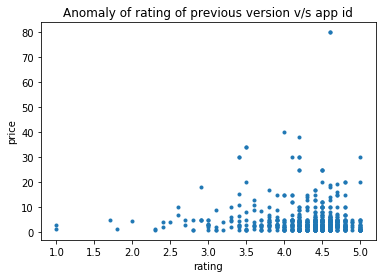

In [67]:
plt.scatter(googleStoreDf['Rating'][(googleStoreDf.Price != 0) & (googleStoreDf.Price < 250)],
            googleStoreDf['Price'][(googleStoreDf.Price != 0) & (googleStoreDf.Price < 250)], marker='.');


plt.scatter(googleStoreDf.loc[googleStoreDf['anomaly27'] == 1.0]['Rating'][(googleStoreDf.Price != 0) & (googleStoreDf.Price < 250)]
            ,googleStoreDf.loc[googleStoreDf['anomaly27'] == 1.0]['Price'][(googleStoreDf.Price != 0) & (googleStoreDf.Price < 250)]
            ,color='red',marker='.');

plt.title('Anomaly of rating of previous version v/s app id')
plt.xlabel("rating")
plt.ylabel("price")
plt.show()